In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('./Data/Dataset Heart Disease.csv')
data_1 = pd.read_csv('./Data/cleveland1.csv')
data_2 = pd.read_csv('./Data/cleveland1.csv')

In [33]:
data.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [34]:
data_1.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [35]:
data_2.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [36]:
combine = pd.concat([data, data_1, data_2], ignore_index=True)

In [37]:
combine.shape

(3428, 14)

In [38]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   float64
 1   age                  3428 non-null   int64  
 2   sex                  3428 non-null   int64  
 3   chest pain type      3428 non-null   int64  
 4   resting bps          1048 non-null   float64
 5   cholesterol          3428 non-null   float64
 6   fasting blood sugar  3428 non-null   int64  
 7   resting ecg          3428 non-null   int64  
 8   max heart rate       3428 non-null   int64  
 9   exercise angina      3428 non-null   int64  
 10  oldpeak              3428 non-null   float64
 11  ST slope             3428 non-null   int64  
 12  target               3428 non-null   int64  
 13  resting bp s         2380 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 375.1 KB


Checking if there are any null values present or not. Checking the percentage gives us a clear sign of missing values.  

In [39]:
(combine.isnull().sum()/len(combine))*100

Unnamed: 0             69.428238
age                     0.000000
sex                     0.000000
chest pain type         0.000000
resting bps            69.428238
cholesterol             0.000000
fasting blood sugar     0.000000
resting ecg             0.000000
max heart rate          0.000000
exercise angina         0.000000
oldpeak                 0.000000
ST slope                0.000000
target                  0.000000
resting bp s           30.571762
dtype: float64

In [40]:
combine.drop('Unnamed: 0', axis=1, inplace=True)
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3428 non-null   int64  
 1   sex                  3428 non-null   int64  
 2   chest pain type      3428 non-null   int64  
 3   resting bps          1048 non-null   float64
 4   cholesterol          3428 non-null   float64
 5   fasting blood sugar  3428 non-null   int64  
 6   resting ecg          3428 non-null   int64  
 7   max heart rate       3428 non-null   int64  
 8   exercise angina      3428 non-null   int64  
 9   oldpeak              3428 non-null   float64
 10  ST slope             3428 non-null   int64  
 11  target               3428 non-null   int64  
 12  resting bp s         2380 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 348.3 KB


Now filling the nullvalues with mean of values.

In [41]:
combine.fillna(combine.mean(), inplace=True)

Now checking again to verify if there are still any null values present. 

In [42]:
combine.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
resting bp s           0
dtype: int64

Now to check correlation between different matrices of data columns. 

<Axes: >

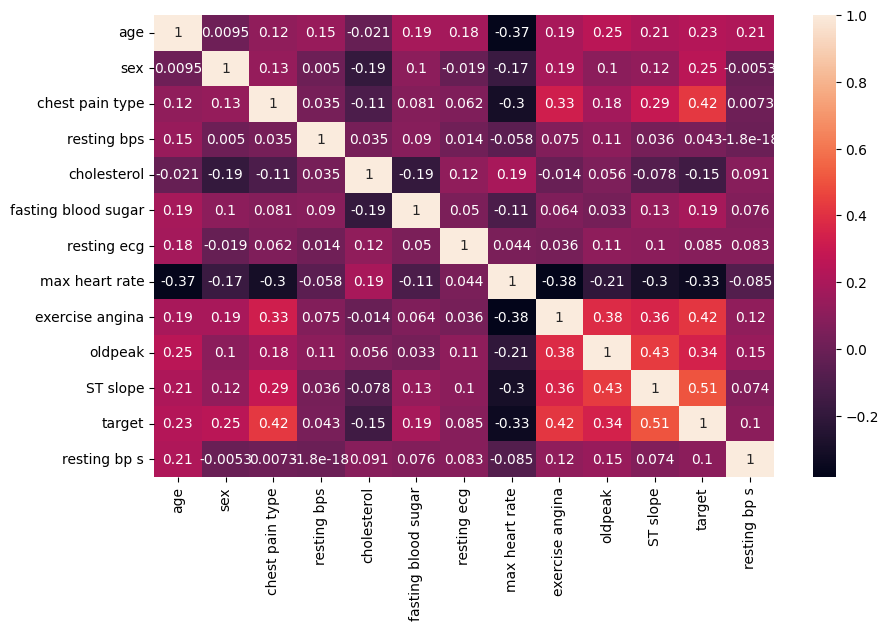

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(combine.corr(), annot=True)

From the figure created, we can clearly see that There is high  correlation between ST SLope and target. 

## Normalizing the Data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(combine), columns=combine.columns)

In [45]:
# norm_data.info()

## Training an testing data

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

The target column will be the column that we will predict and rest of the columns will be use for prediction. 

In [55]:
X = norm_data.drop('target', axis=1)
Y = norm_data[['target']]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression Model

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

c:\Users\Abdullah\.conda\envs\python_eda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Abdullah\.conda\envs\python_eda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [80]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
log_accuracy = log_model.score(x_test, y_test)
print(f"Logistic Regression Accuracy: {log_accuracy}")

Logistic Regression Accuracy: 0.8119533527696793


In [82]:
y_pred = log_model.predict(x_test)
y_pred_prob = log_model.predict_proba(x_test)[:, 1]

### Model Evaluation

Logistic Regression Accuracy: 0.8119533527696793
Logistic Regression Precision: 0.8153409090909091
Logistic Regression Recall: 0.8176638176638177


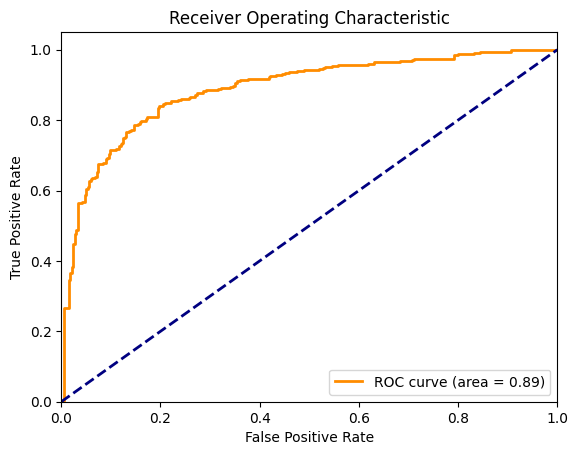

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# Model Evaluation: Accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")

# Model Evaluation: Precision
log_precision = precision_score(y_test, y_pred)
print(f"Logistic Regression Precision: {log_precision}")

# Model Evaluation: Recall
log_recall = recall_score(y_test, y_pred)
print(f"Logistic Regression Recall: {log_recall}")

# Model Evaluation: ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

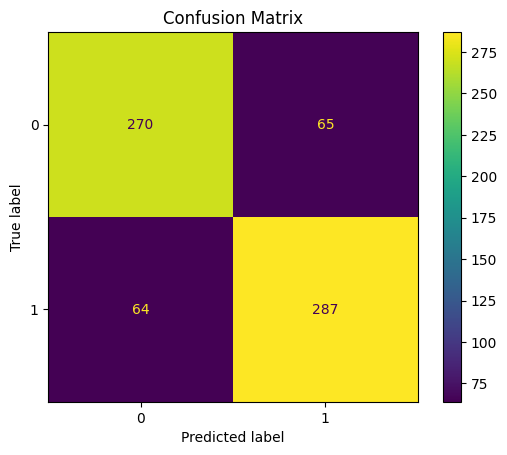

In [88]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()